<h2>Parametric<h2>

In [1]:
#Data Import
import pandas as pd
nycf = pd.read_csv("nyc-flights.csv")

In [2]:
nycf.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,6,30,940,15,1216,-4,VX,N626VA,407,JFK,LAX,313,2475,9,40
1,2013,5,7,1657,-3,2104,10,DL,N3760C,329,JFK,SJU,216,1598,16,57
2,2013,12,8,859,-1,1238,11,DL,N712TW,422,JFK,LAX,376,2475,8,59
3,2013,5,14,1841,-4,2122,-34,DL,N914DL,2391,JFK,TPA,135,1005,18,41
4,2013,7,21,1102,-3,1230,-8,9E,N823AY,3652,LGA,ORF,50,296,11,2


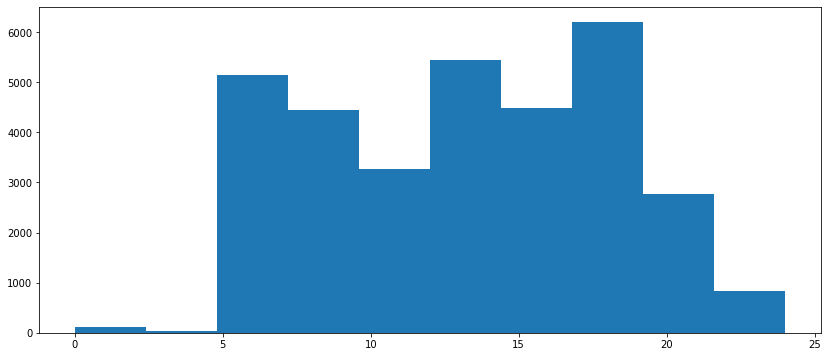

In [3]:
#Checking Histogram
import matplotlib
from matplotlib import pyplot 
%matplotlib inline
pyplot.figure(figsize=(14,6))
pyplot.hist(nycf['hour'])
pyplot.show()

In [4]:
#does not look normally distrubuted
from scipy.stats import shapiro

DataToTest = nycf['hour']

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.96, p=0.000000000000000000000000000000
Not a normal distribution


c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [5]:
#Generating normally distributed data from Python
from numpy.random import randn
DataToTest = randn(100)

In [6]:
stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.99, p=0.942240536212921142578125000000
Normal distribution


In [7]:
#D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
DataToTest = nycf['hour']

stat, p = normaltest(DataToTest)

print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Normal distribution')

else:
    print('Not a Normal distribution')

stat=12021.8775397058, p=0.0000000000
Not a Normal distribution


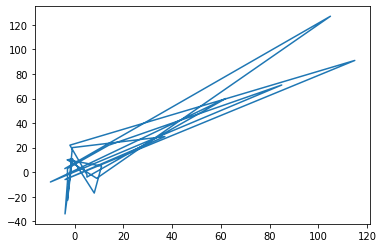

In [8]:
FirstSample = nycf[1:25]['dep_delay']
SecondSample = nycf[1:25]['arr_delay']

pyplot.plot(FirstSample,SecondSample)
pyplot.show()

In [9]:
#Spearman Rank Correlation
from scipy.stats import spearmanr
stat, p = spearmanr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('Independent samples')
else:
    print('Dependent samples')

stat=0.689, p=0.000199
Dependent samples


In [10]:
#pearson correlation
from scipy.stats import pearsonr
stat, p = pearsonr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('Independent samples')
else:
    print('Dependent samples')

stat=0.913, p=0.000000
Dependent samples


In [11]:
nycf[1:25].corr(method="pearson")

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,-0.001355,-0.170787,-0.096595,-0.178824,-0.115772,-0.146660,0.334986,0.319547,-0.177511,0.226468
day,NaN,-0.001355,1.000000,-0.001601,0.146707,0.132753,0.105543,0.261232,-0.269671,-0.220860,0.006918,-0.248751
dep_time,NaN,-0.170787,-0.001601,1.000000,0.641430,0.573713,0.532980,-0.254978,0.100613,0.137897,0.999429,-0.158365
dep_delay,NaN,-0.096595,0.146707,0.641430,1.000000,0.113580,0.912888,-0.075466,-0.063398,-0.031144,0.641022,-0.100373
arr_time,NaN,-0.178824,0.132753,0.573713,0.113580,1.000000,-0.085921,-0.112325,0.049894,0.065583,0.564412,0.171487
arr_delay,NaN,-0.115772,0.105543,0.532980,0.912888,-0.085921,1.000000,-0.027536,-0.025671,-0.028722,0.534804,-0.146610
flight,NaN,-0.146660,0.261232,-0.254978,-0.075466,-0.112325,-0.027536,1.000000,-0.474833,-0.469756,-0.241940,-0.336519
air_time,NaN,0.334986,-0.269671,0.100613,-0.063398,0.049894,-0.025671,-0.474833,1.000000,0.983856,0.086102,0.406618
distance,NaN,0.319547,-0.220860,0.137897,-0.031144,0.065583,-0.028722,-0.469756,0.983856,1.000000,0.123674,0.391647


In [12]:
#Tests whether two categorical variables are related or independent.
#Assumptions - independent observation, size in each box of contingency table > 25
#Example of the Chi-Squared Test
FeeData = pd.read_csv("fee_status.csv")

In [13]:
FeeData.head(10)

,Branch,Division,fee_status,Mode
0,IT,A,Paid,Credit Card
1,IT,A,Not Paid,Credit Card
2,CSE,C,Paid,Debit Card
3,CSE,C,Paid,Debit Card
4,IT,D,Not Paid,Credit Card
5,CSE,D,Not Paid,Debit Card
6,IT,F,Paid,Credit Card
7,CSE,F,Paid,Debit Card
8,IT,E,Not Paid,Debit Card
9,CSE,E,Not Paid,Credit Card


In [14]:
contingency_data = pd.crosstab(FeeData['Mode'], FeeData['fee_status'],margins = False)

In [15]:
contingency_data

fee_status,Not Paid,Paid
Mode,,
Credit Card,3,3
Debit Card,3,4


In [16]:
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Independent categories')
else:
    print('Dependent categories')

stat=0.000, p=1.000
Independent categories


In [17]:
contingency_data = [[120,6],[200,40]]

In [18]:
stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Independent categories')
else:
    print('Dependent categories')

stat=9.600, p=0.002
Dependent categories


In [19]:
#T-test
my_score = [23,21,31,20,19,35,26,22,21,19]
abc_score = [46,42,62,40,38,70,52,44,42,38]

In [20]:
#Lets check mean of our scores
import numpy as np
print('Vedashree mean score:', np.mean(my_score))
print('ABC mean score:', np.mean(abc_score))

Vedashree mean score: 23.7
ABC mean score: 47.4


In [21]:
#One Sample T-test
import scipy
scipy.stats.ttest_1samp(my_score,20)

Ttest_1sampResult(statistic=2.1681507160852993, pvalue=0.058288767709368715)

In [22]:
#Independent Sample T-test
scipy.stats.ttest_ind(my_score,abc_score)

Ttest_indResult(statistic=-6.210850679090182, pvalue=7.3390410384768156e-06)

In [23]:
my_score_second_Tour = [46,42,62,40,38,70,52,44,42,38]

In [24]:
#Paired sample T-Test
scipy.stats.ttest_rel(my_score,my_score_second_Tour)

Ttest_relResult(statistic=-13.88788431654638, pvalue=2.1983272300073563e-07)

In [25]:
#Anova test
#Assumption -Normal distributon, same variance, identical distribution
average_score = [40,44,60,50,48,68,55,46,44,54]

In [26]:
tstat, p = scipy.stats.f_oneway(my_score, average_score, abc_score)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Same distribution of scores')
else:
    print('Different distributions of scores')

stat=9.600, p=0.000
Different distributions of scores


In [27]:
class_A_score = [91,90,81,80,76]
class_B_score = [88,86,85,84,83]

<h2>Non-parametric<h2>

In [28]:
tstat, p = scipy.stats.mannwhitneyu(class_A_score, class_B_score)#does not assume normal distribution
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Same distribution')
else:
    print('Different distributions')

stat=9.600, p=0.690
Same distribution


In [29]:
#Augmented Dickey-Fuller Test -  null hypothesis - Series is non stationary
#Definition of stationary time series - constant mean and variance over regular intervals sets
from statsmodels.tsa.stattools import adfuller
stock_price_data = [121,131,142,121,131,153,121,131,167]
stat, p, lags, obs, crit, t = adfuller(stock_price_data)

In [30]:
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Series is not stationary')
else:
    print('Series is stationary')

stat=-5750836411491.121, p=0.000
Series is stationary


In [31]:
stock_price_data = [121,131,142,121,131,153,121,131,167]
stat, p, lags, obs, crit, t = adfuller(stock_price_data)

In [32]:
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Series is not stationary')
else:
    print('Series is stationary')

stat=0.922, p=0.993
Series is not stationary
